# Ordinary Least Squares

$$ y = w_0 + \sum_{i=1}^{m} w_ix_i$$

dependency function defined as a model that relates dependant variable y to explanatory factors/features

For linear models equation is as shown above, where m is the number of features if we add a fictitious dimension x_0 = 1 (called bias term), then thie equation can simply be written in its vectorized implementation $$ w^Tx $$

Matrix of n observations where rows are observations from data set, model is defined as
$$ y = Xw + \epsilon $$

w is a (m+1) x 1 column vector of model parameters (weights)

X is a n x (m+1) matrix of observations/features

𝜖 is a n x 1 random column vector (error/noise)

y is a n x 1 column vector (dependent or target variable)

Weight matrix is called linear if
$$ w_i = \omega_`i y_1 + \omega_2i y_2 + ... +  \omega_ni y_n$$

Estimator w is unbiased when expectation is equal to real but unknown value of estimated parameter
$$ E[w_i] = w_i $$

Ordinary least squares method is a statistical method that minimizes the mean squared error between actual value of dependent variable and predicted value given by model

$$ OLS (X,y,w) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - w^Tx_i)^2  $$
$$ \frac{1}{2n} ||y-Xw||^2  $$
$$ \frac{1}{2n} (y-Xw)^T (y-Xw)  $$

Calculating derivatives for the model parameters gives us
$$ w = (X^TX)^{-1}X^Ty $$

**Maximum Likelihood Estimation**

Bernoulli Distribution: random variable follows this distribution if it takes only two binary values with probability theta and 1 - theta

probability distribution function: $$ p(\theta,x) = \theta^x (1-\theta)^{1-x}, x ∈ {0,1} $$

If there are 400 experiements and outcomes are denoted with 0 and 1, probability of observing exactly 117 realizations of random variable x = 1 and 283 realizations of x = 0:

$$ p(x;\theta) = \prod_{i=1}^{400} \theta^{x_i}(1-\theta)^{1-x_i} = \theta^{117}(1-\theta)^{283} $$

after taking the logarithmic derivative, we get -283 / (1-theta);

Assuming normal distribution (Gaussian), we get slightly different results

**Bias-Variance Decomposition**

True value of target variable is sum of a deterministic function f(x) and random error e, y = f(x) + e;

Error is normally distributed with zero mean and some variance (Gaussian)

True value of target variable is also normally distributed

Try to approximate a deterministic but unknown function f(x) provides an estimate of function f

Final model that provides forecast error of any linear random error model f(x) + e is composed of 
- Squared bias Bias(f) is average error for all sets of data;
- Variance Var(f) is error variability or by how much error will vary if we train model on different sets of data;
- irremovable error: greek sigma ^ 2
Bias(f)^2 + Var(f) + irremovable error
Low variance and low bias: Bullseye, clustered close together
Low bias, High Variance: somewhat close to bullseye but highly scattered
High Bias Low variance: Away from bullseye, low variance (clustered closely)
High Bias High Variance: Spread out, away from bullseye

As a model becomes more computational (more parameters) variance increases, but bias decreases
Sometimes data is overfit

Optimum Model Complexity occurs when both Bias and Variance are relatively low and total error is minimzed (model complexity is in the middle)

**Regularization of Linear Regression**

Intentionally increasing model bias to reduce variance of Model Var. Often times, need to correct matrix X^TX so that it is not non-degenerate and has an inverse matrix

Tikhonov regularization, simply the addition of a new member to mean squared error. It is often expressed as the product of a number by identity matrix.

Similar to regularized gradient descent with Matlab 
$$ w = (X^TX + \lambda E)^{-1}X^Ty $$

optimal value for lambda to shift solution toward 0

# Logistic Regression

**Linear Classifier**
two values of target class separated by hyperplane (linearly separable)
Considering a binary problem where +1 is positive and -1 is negative, simple linear classifier can be defined using regression as a(x) = sign(w^Tx) where x is a feature vector, w is vector of weights in linear model with bias unit, sign(theta) is a signum function that returns sign of its argument, a(x) is classifier response for x
$$ a(x) = sign(w^Tx) $$

Logistic Regression as a Linear Classifier
$$ p_+ = P(y_i = 1  |  x_i, w) $$

Probability of a feature being assigned to class +1

Sigmoid function as discussed before is 1 / 1+e^-z

In [11]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

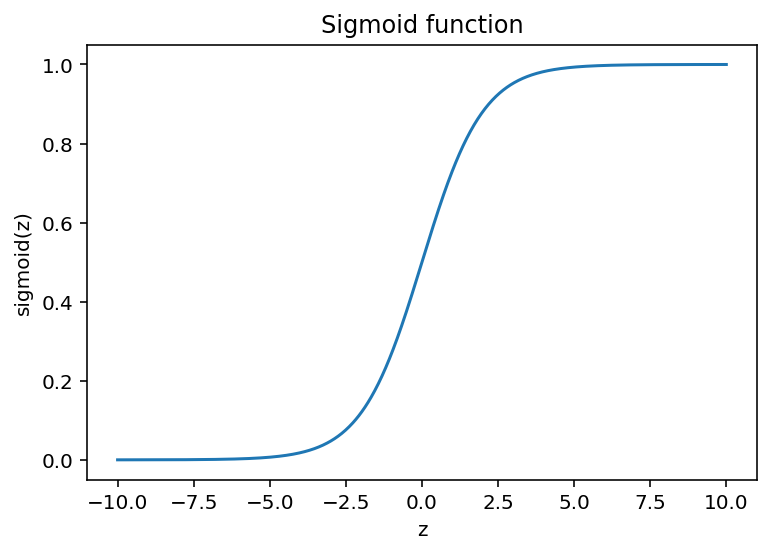

In [12]:
def sigma(z):
    return 1.0 / (1 + np.exp(-z))
xx = np.linspace(-10, 10, 1000)
plt.plot(xx, [sigma(x) for x in xx])
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.title("Sigmoid function");

Probability of event X is P(X), odds ratio OR(x) is determined by P(X) / (1 - P(X))
Log OR(X) can take all real numbers hence, we can use OLS

adding all weights together and bias unit creates our matrix w^Tx (defines hyperplane)

Compute log odds ratio of this matrix, And then we have chances of assigning examples to class of + or -, and calculate Probability using sigmoid function of w^Tx

**MLE and Logistic Regression**

Probability of negative is given as sigmoid(-w^Txi) and these can be combined to form
$$ P(y = y_i | x_i, w) = \sigma{(y_iw^Tx_i)} $$ 
$$ P(y = -1| x_i, w) = \sigma{(-w^Tx_i)} $$ 
$$ P(y = 1| x_i, w) = \sigma{(w^Tx_i)} $$ 

**Regularization of Logistic Loss**

Minimze log function of X,y,w by adding lambda term * |w|^2 gives us logistic loss function with regularization constant C = 1/lambda
$$ w = arg min J (X,y,w) = arg min (C \sum_{i=1}^{l}log (1 + exp^{-y_iw^Tx_i}))  + \lambda|w|^2 $$

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
# Load the training and test data sets
train_df = pd.read_csv('/Users/aadrijupadya/Downloads/sampledata/train_sessions.csv', index_col='session_id')
                       
test_df = pd.read_csv('/Users/aadrijupadya/Downloads/sampledata/test_sessions.csv', index_col='session_id')


# Convert time1, ..., time10 columns to datetime type
times = ['time%s' % i for i in range(1, 11)]
train_df[times] = train_df[times].apply(pd.to_datetime)
test_df[times] = test_df[times].apply(pd.to_datetime)
# Sort the data by time
train_df = train_df.sort_values(by='time1')
# Look at the first rows of the training set
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
21669,56,2013-01-12 08:05:57,55.0,2013-01-12 08:05:57,NaN,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
54843,56,2013-01-12 08:37:23,55.0,2013-01-12 08:37:23,56.0,2013-01-12 09:07:07,55.0,2013-01-12 09:07:09,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
77292,946,2013-01-12 08:50:13,946.0,2013-01-12 08:50:14,951.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:16,...,2013-01-12 08:50:16,948.0,2013-01-12 08:50:16,784.0,2013-01-12 08:50:16,949.0,2013-01-12 08:50:17,946.0,2013-01-12 08:50:17,0
114021,945,2013-01-12 08:50:17,948.0,2013-01-12 08:50:17,949.0,2013-01-12 08:50:18,948.0,2013-01-12 08:50:18,945.0,2013-01-12 08:50:18,...,2013-01-12 08:50:18,947.0,2013-01-12 08:50:19,945.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:20,0
146670,947,2013-01-12 08:50:20,950.0,2013-01-12 08:50:20,948.0,2013-01-12 08:50:20,947.0,2013-01-12 08:50:21,950.0,2013-01-12 08:50:21,...,2013-01-12 08:50:21,946.0,2013-01-12 08:50:21,951.0,2013-01-12 08:50:22,946.0,2013-01-12 08:50:22,947.0,2013-01-12 08:50:22,0


In [7]:

sites = ['site%s' % i for i in range(1, 11)]
train_df[sites] = train_df[sites].fillna(0).astype('int')
test_df[sites] = test_df[sites].fillna(0).astype('int')
# Load website dictionary
with open("/Users/aadrijupadya/Downloads/sampledata/site_dic.pkl", "rb") as input_file:
    site_dict = pickle.load(input_file)
# Create dataframe for the dictionary
sites_dict = pd.DataFrame(list(site_dict.keys()), 
                          index=list(site_dict.values()), columns=['site'])
print(u'Websites total:', sites_dict.shape[0])
sites_dict.head()


Websites total: 48371


,site
25075,www.abmecatronique.com
13997,groups.live.com
42436,majeureliguefootball.wordpress.com
30911,cdt46.media.tourinsoft.eu
8104,www.hdwallpapers.eu


In [8]:
# Our target variable
y_train = train_df['target']
# United dataframe of the initial data 
full_df = pd.concat([train_df.drop('target', axis=1), test_df])
# Index to split the training and test data sets
idx_split = train_df.shape[0]

In [9]:
full_sites = full_df[sites]
full_sites.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,
21669,56,55,0,0,0,0,0,0,0,0
54843,56,55,56,55,0,0,0,0,0,0
77292,946,946,951,946,946,945,948,784,949,946
114021,945,948,949,948,945,946,947,945,946,946
146670,947,950,948,947,950,952,946,951,946,947


In [13]:
# sequence of indices
sites_flatten = full_sites.values.flatten()
# and the matrix we are looking for
full_sites_sparse = csr_matrix(([1] * sites_flatten.shape[0],
                                sites_flatten,
                                range(0, sites_flatten.shape[0] + 10, 10)))[:, 1:]


Quick note about Sparse Matrices:
    Generally because this is such a large matrix, it would require an unfathomable amount of data to store, hence we use sparse matrices where we find the ratio between nonzero elements and zero elements and sparse matrices store only these values, successfully allocating memory

In [20]:
#data, create the list of ones, length of which equal to the number of elements 
# in the initial dataframe (9)
# By summing the number of ones in the cell, we get the frequency,
# number of visits to a particular site per session
data = [1] * 9
# To do this, you need to correctly distribute the ones in cells
# Indices - website ids, i.e. columns of a new matrix. 
# We will sum ones up grouping them by sessions (ids)
indices = [1, 0, 0, 1, 3, 1, 2, 3, 4]
# Indices for the division into rows (sessions)
# For example, line 0 is the elements between the indices [0; 3) - 
# the rightmost value is not included
# Line 1 is the elements between the indices [3; 6)
# Line 2 is the elements between the indices [6; 9) 
indptr = [0, 3, 6, 9]
# Aggregate these three variables into a tuple and compose a matrix
# To display this matrix on the screen transform it into the usual "dense" matrix
condensed_frequency = csr_matrix((data, indices, indptr)).todense()
print(csr_matrix((data, indices, indptr)).todense())
#cutting the first column because it is unnecessary
print(np.delete(condensed_frequency, 0, axis=1))


[[2 1 0 0 0]
 [0 2 0 1 0]
 [0 0 1 1 1]]
[[1 0 0 0]
 [2 0 1 0]
 [0 1 1 1]]


Essentially, Sparse Matrices are frequency tables that condense memory. The initial data indicates the specific site visited, and csr_matrix basically provides a frequency table based on this data and is able to condense itself  

In [22]:
def get_auc_lr_valid(X, y, C=1.0, seed=17, ratio = 0.9):
    # Split the data into the training and validation sets
    idx = int(round(X.shape[0] * ratio))
    # Classifier training
    lr = LogisticRegression(C=C, random_state=seed, 
                            solver='lbfgs', n_jobs=-1).fit(X[:idx, :], y[:idx])
    # Prediction for validation set
    y_pred = lr.predict_proba(X[idx:, :])[:, 1]
    # Calculate the quality
    score = roc_auc_score(y[idx:], y_pred)
    
    return score
"%%time"
# Select the training set from the united dataframe (where we have the answers)
X_train = full_sites_sparse[:idx_split, :]
# Calculate metric on the validation set
print(get_auc_lr_valid(X_train, y_train))

0.9199789471713791


A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The method was originally developed for operators of military radar receivers starting in 1941, which led to its name.

In [24]:
#Making prediction on test set
# Function for writing predictions to a file
def write_to_submission_file(predicted_labels, out_file,
                             target='target', index_label="session_id"):
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, 
                                                  predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)
# Train the model on the whole training data set
# Use random_state=17 for repeatability
# Parameter C=1 by default, but here we set it explicitly
lr = LogisticRegression(C=1.0, solver='lbfgs', 
                        random_state=17).fit(X_train, y_train)
# Make a prediction for test data set
X_test = full_sites_sparse[idx_split:,:]
y_test = lr.predict_proba(X_test)[:, 1]
# Write it to the file which could be submitted
write_to_submission_file(y_test, 'baseline_1.csv')

/Users/aadrijupadya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
print(get_auc_lr_valid(X_test, y_test))

0.9199789471713791


**Regularization Visualization**

In [1]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
#sharper plots
%config InlineBackend.figure_format = 'retina'


from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,
                                     cross_val_score)
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [3]:
# loading data
data = pd.read_csv(
    DATA_PATH + "microchip_tests.txt",
    header=None,
    names=("test1", "test2", "released")
)
# getting some info about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   test1     118 non-null    float64
 1   test2     118 non-null    float64
 2   released  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [4]:
data.head()

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [5]:
data.tail()

,test1,test2,released
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


In [6]:
X = data.iloc[:, :2].values
y = data.iloc[:, 2].values

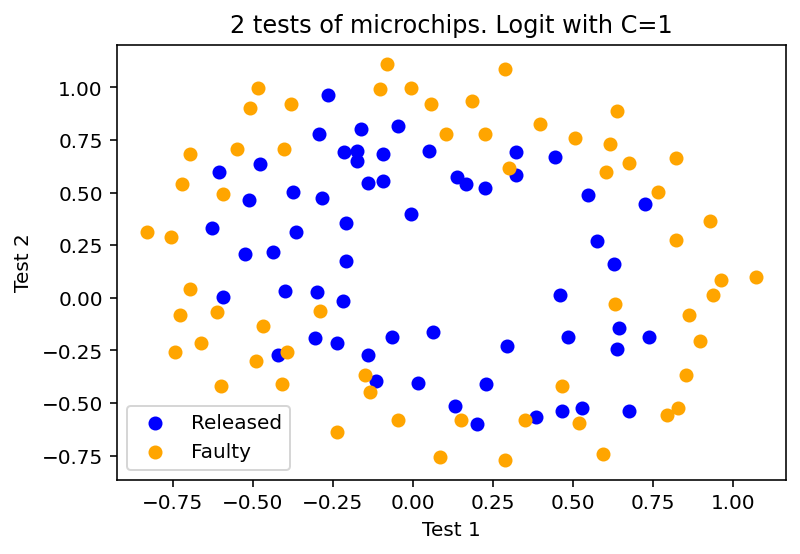

In [7]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Released")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="orange", label="Faulty")
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("2 tests of microchips. Logit with C=1")
plt.legend();

In [8]:
def plot_boundary(clf, X, y, grid_step=0.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, grid_step), np.arange(y_min, y_max, grid_step)
    )

    # to every point from [x_min, m_max]x[y_min, y_max]
    # we put in correspondence its own color
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [9]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
X_poly.shape

(118, 36)

Accuracy on training set: 0.627


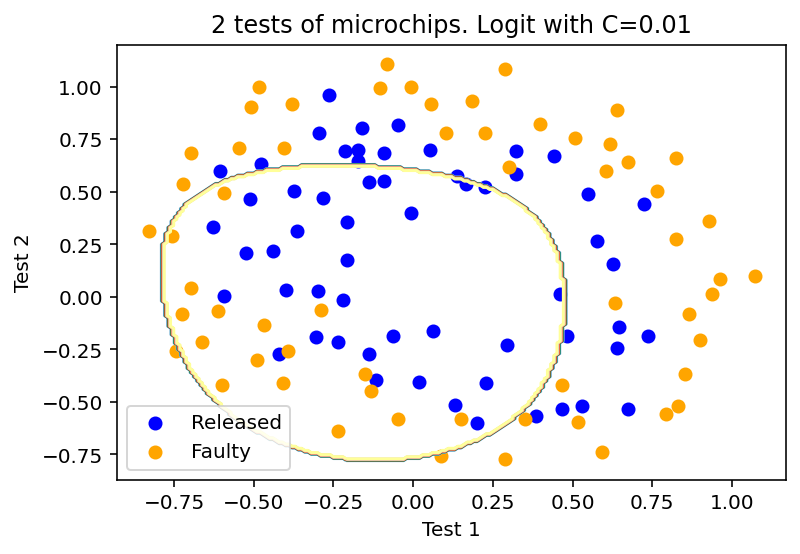

In [10]:
C = 1e-2
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Released")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="orange", label="Faulty")
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("2 tests of microchips. Logit with C=%s" % C)
plt.legend()

print("Accuracy on training set:", round(logit.score(X_poly, y), 3))

Accuracy on training set: 0.831


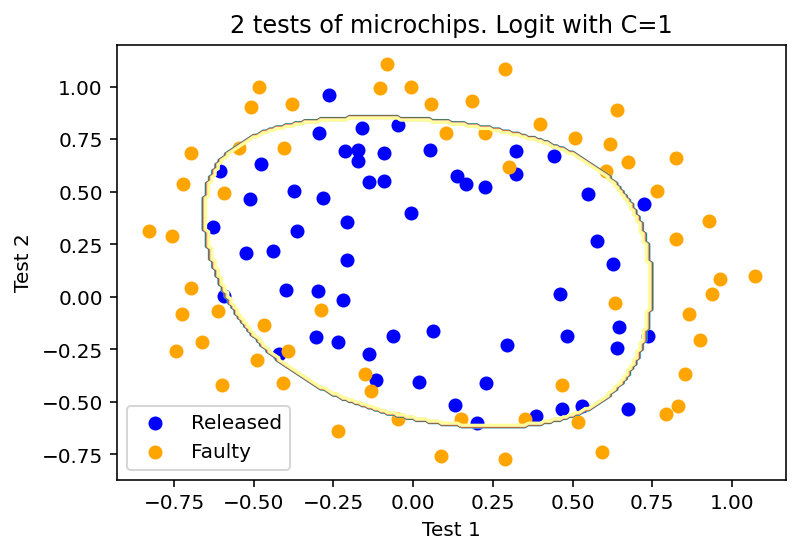

In [13]:
C = 1
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Released")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="orange", label="Faulty")
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("2 tests of microchips. Logit with C=%s" % C)
plt.legend()

print("Accuracy on training set:", round(logit.score(X_poly, y), 3))

Accuracy on training set: 0.831


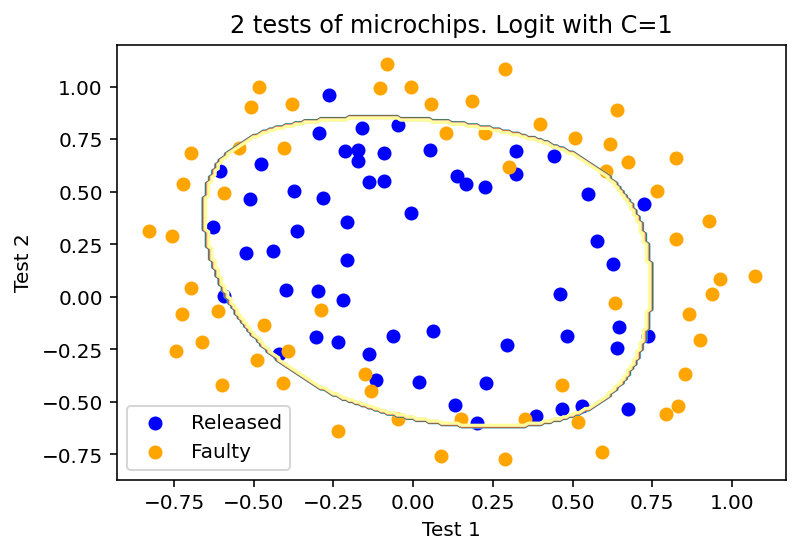

In [16]:
C = 1
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Released")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="orange", label="Faulty")
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("2 tests of microchips. Logit with C=%s" % C)
plt.legend()

print("Accuracy on training set:", round(logit.score(X_poly, y), 3))

##overfitting

Cost/Loss Function: 
L = logistic loss function summed over dataset
C = reverse regularization Coefficient (same C from sklearn's LR algorithm )
$$ J(X,y,w) = L + (1/C)||w||^L $$

Learnings
- Larger the parameter C, the more complex relationships and model can be formed (as shown in  visualization), affects complexity of model
- If C is too small, weights are also too small and hence the model is not penalized for errors and will underfit because it does not learn
- If regularization is too week (C is too large), w has high absolute value, will cause model to overfit
- Model cannot understand/learn what value of C to choose, this must be done through another algorithm (hyper parameterization and cross-validation)

Regularization parameter tuning


LogisticRegressionCV - grid search of parameters followed by cross-validation, for arbitrary models we can use GridSearchCV, RandomizedSearchCV, or hyperopt

In [18]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, n_jobs=-1)
logit_searcher.fit(X_poly, y);
##using 5 fold CV

In [19]:
logit_searcher.C_

array([150.78450459])

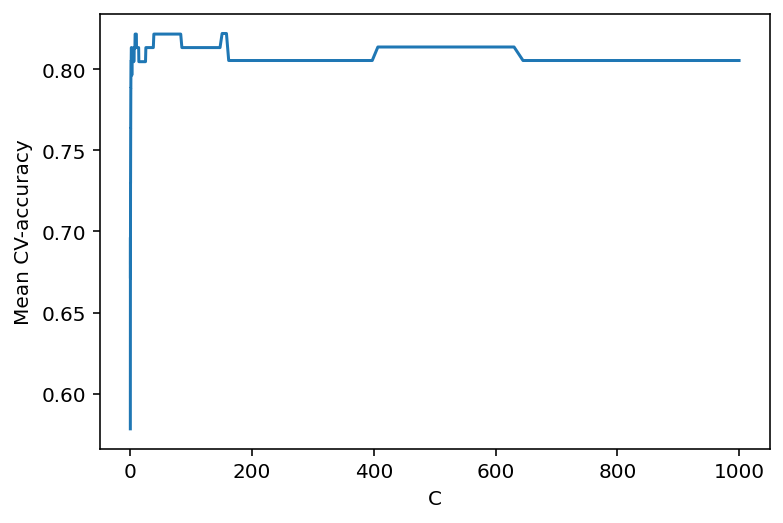

In [20]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel("C")
plt.ylabel("Mean CV-accuracy");

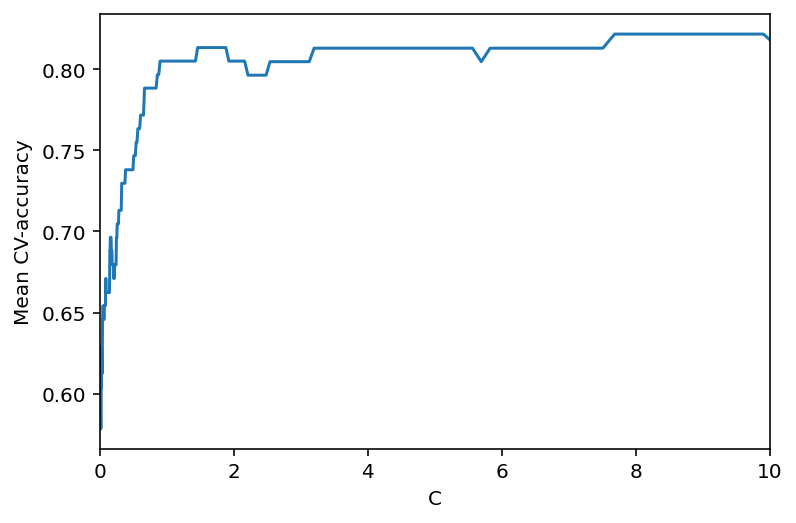

In [21]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel("C")
plt.ylabel("Mean CV-accuracy")
plt.xlim((0, 10));


these curves are known as validation curves

### When to use Logistic Regression vs When to Not

Bag of words model to classify IMDB movie reviews as positive or negative

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
#sharper plots
%config InlineBackend.figure_format = 'retina'
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
import tarfile
from io import BytesIO

import requests

url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"


def load_imdb_dataset(extract_path, overwrite=False):
    # check if existed already
    if (
        os.path.isfile(os.path.join(extract_path, "aclImdb", "README"))
        and not overwrite
    ):
        print("IMDB dataset is already in place.")
        return

    print("Downloading the dataset from:  ", url)
    response = requests.get(url)

    tar = tarfile.open(mode="r:gz", fileobj=BytesIO(response.content))

    data = tar.extractall(extract_path)

In [25]:
DATA_PATH = "/Users/aadrijupadya/Downloads/aclImdb"

load_imdb_dataset(extract_path=DATA_PATH)

PermissionError: [Errno 13] Permission denied: '../../_static'

In [3]:
# creating dataset
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

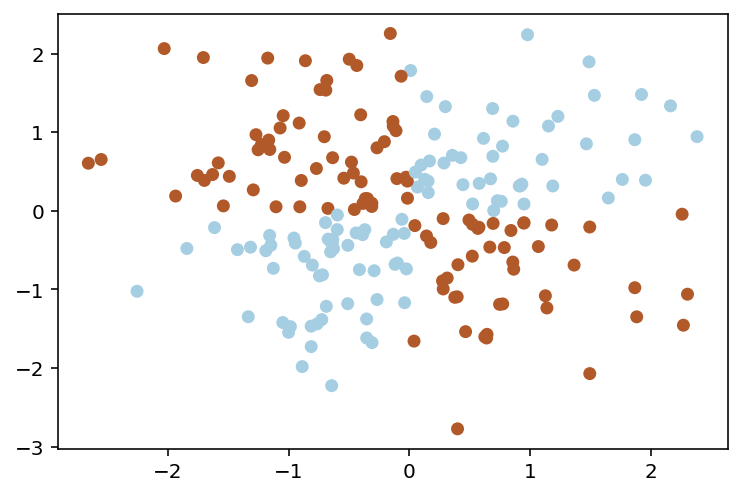

In [4]:
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired);



In [5]:
def plot_boundary(clf, X, y, plot_title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.PuOr_r,
    )
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes="--")
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);

In [6]:
#no good hyperplanes to separate with this data, so logistic regression is a poor fit (XOR problem)

<ipython-input-5-cd5d9f13f81d>:16: UserWarning: No contour levels were found within the data range.
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes="--")
<ipython-input-5-cd5d9f13f81d>:16: UserWarning: The following kwargs were not used by contour: 'linetypes'
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes="--")


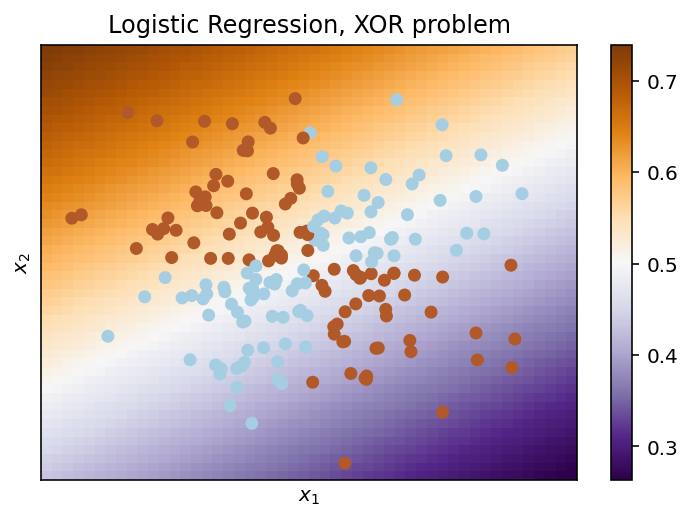

In [7]:
plot_boundary(
    LogisticRegression(solver="lbfgs"), X, y, "Logistic Regression, XOR problem"
)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

<ipython-input-5-cd5d9f13f81d>:16: UserWarning: No contour levels were found within the data range.
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes="--")
<ipython-input-5-cd5d9f13f81d>:16: UserWarning: The following kwargs were not used by contour: 'linetypes'
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes="--")


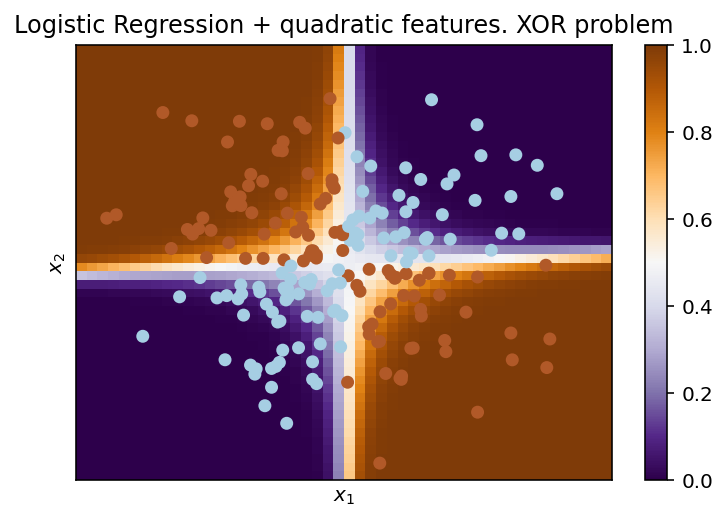

In [9]:
logit_pipe = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2)),
        ("logit", LogisticRegression(solver="lbfgs")),
    ]
)
plot_boundary(logit_pipe, X, y, "Logistic Regression + quadratic features. XOR problem")

### Validation and Learning Curves

In [10]:
import warnings
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
#sharper plots
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import (LogisticRegression, LogisticRegressionCV,
                                  SGDClassifier)
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

warnings.filterwarnings("ignore")

In [11]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [12]:
data = pd.read_csv(DATA_PATH + "telecom_churn.csv").drop("State", axis=1)
data["International plan"] = data["International plan"].map({"Yes": 1, "No": 0})
data["Voice mail plan"] = data["Voice mail plan"].map({"Yes": 1, "No": 0})

y = data["Churn"].astype("int").values
X = data.drop("Churn", axis=1).values

In [15]:
data

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [16]:
#Training logistic regression model with stochastic gradient descent
alphas = np.logspace(-2, 0, 20)
sgd_logit = SGDClassifier(loss="log", n_jobs=-1, random_state=17, max_iter=5)
logit_pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2)),
        ("sgd_logit", sgd_logit),
    ]
)
val_train, val_test = validation_curve(
    estimator=logit_pipe, X=X, y=y, param_name="sgd_logit__alpha", param_range=alphas, cv=5, scoring="roc_auc"
)

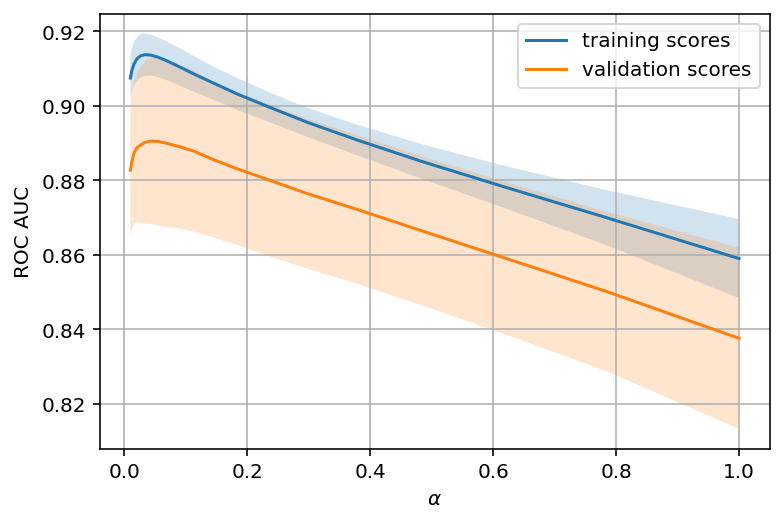

In [17]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )


plot_with_err(alphas, val_train, label="training scores")
plot_with_err(alphas, val_test, label="validation scores")
plt.xlabel(r"$\alpha$")
plt.ylabel("ROC AUC")
plt.legend()
plt.grid(True);
#quality measured by ROC-AUC (plots false=positive and true positive rate to test binary classifiers), visualized by validation curves

https://miro.medium.com/max/722/1*pk05QGzoWhCgRiiFbz-oKQ.png

Underfit: Training and validation curves very close to each other, not enough parameters
Overfit: Significant difference between both curves, too many parameters, not enough regularization

In [19]:
def plot_learning_curve(degree=2, alpha=0.01):
    train_sizes = np.linspace(0.05, 1, 20)
    logit_pipe = Pipeline(
        [
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=degree)),
            (
                "sgd_logit",
                SGDClassifier(n_jobs=-1, random_state=17, alpha=alpha, max_iter=5),
            ),
        ]
    )
    N_train, val_train, val_test = learning_curve(
        logit_pipe, X, y, train_sizes=train_sizes, cv=5, scoring="roc_auc"
    )
    plot_with_err(N_train, val_train, label="training scores")
    plot_with_err(N_train, val_test, label="validation scores")
    plt.xlabel("Training Set Size")
    plt.ylabel("AUC")
    plt.legend()
    plt.grid(True);

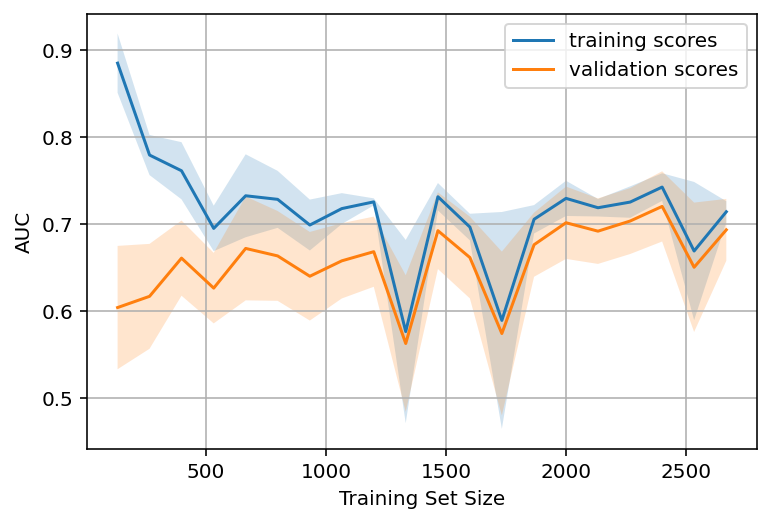

In [21]:
plot_learning_curve(degree=2, alpha=10)

#learning curves

Small amounts of data --> tons of overfitting, errors converge eventually, getting closer to underfitting

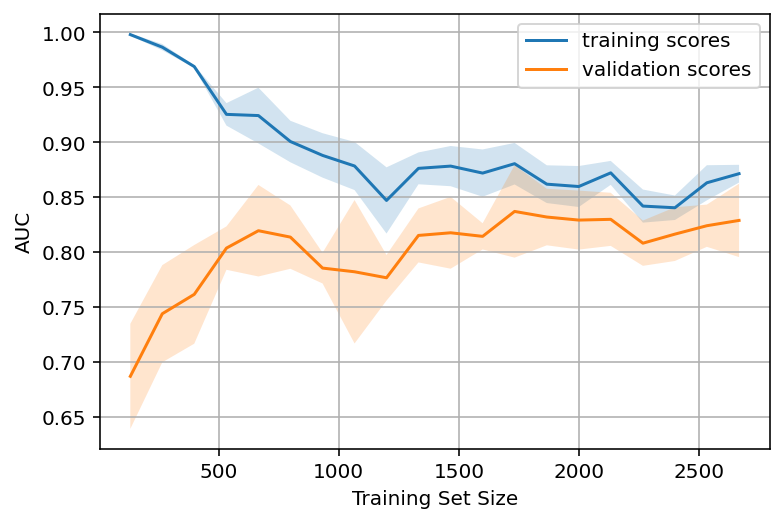

In [22]:
plot_learning_curve(degree=2, alpha=1e-4)

Conclusions
- error on training set doesn't give insight on model quality
- CV error shows how well model fits data
- Validation curve (graph showing results on training and validation sets depending on model complexity)
- Close curves = underfitting, far curves = overfitting
- Learning curves
    - if curves converge, adding new data will not help, necessary to change model complexity
    - if curves have not converged, adding new data can help

# Practice Test

In [23]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     train_test_split)
from sklearn.preprocessing import StandardScaler

In [24]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [25]:
data = pd.read_csv(DATA_PATH + "winequality-white.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [38]:
y = data["quality"]
X = data.drop("quality",axis=1)
X_train, X_holdout, y_train, y_holdout = train_test_split(X,y,test_size = 0.3,random_state = 17)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

In [39]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train);

In [48]:
print(
    "Mean squared error (train): %.3f"
    % mean_squared_error(y_train, linreg.predict(X_train_scaled))
)
print(
    "Mean squared error (test): %.3f"
    % mean_squared_error(y_holdout, linreg.predict(X_holdout_scaled))
)

Mean squared error (train): 0.558
Mean squared error (test): 0.584


In [49]:
linreg_coef = pd.DataFrame(
    {"coef": linreg.coef_, "coef_abs": np.abs(linreg.coef_)},
    index=data.columns.drop("quality"),
)
linreg_coef.sort_values(by="coef_abs", ascending=False)

,coef,coef_abs
density,-0.665720,0.665720
residual sugar,0.538164,0.538164
volatile acidity,-0.192260,0.192260
pH,0.150036,0.150036
alcohol,0.129533,0.129533
fixed acidity,0.097822,0.097822
sulphates,0.062053,0.062053
free sulfur dioxide,0.042180,0.042180
total sulfur dioxide,0.014304,0.014304
chlorides,0.008127,0.008127


Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [54]:
lasso1 = Lasso(alpha=0.01, random_state=17)
lasso1.fit(X_train_scaled, y_train)

Lasso(alpha=0.01, random_state=17)

In [55]:
lasso1_coef = pd.DataFrame(
    {"coef": lasso1.coef_, "coef_abs": np.abs(lasso1.coef_)},
    index=data.columns.drop("quality"),
)
lasso1_coef.sort_values(by="coef_abs", ascending=False)

,coef,coef_abs
alcohol,0.322425,0.322425
residual sugar,0.256363,0.256363
density,-0.235492,0.235492
volatile acidity,-0.188479,0.188479
pH,0.067277,0.067277
free sulfur dioxide,0.043088,0.043088
sulphates,0.029722,0.029722
chlorides,-0.002747,0.002747
fixed acidity,-0.000000,0.000000
citric acid,-0.000000,0.000000


In [56]:
alphas = np.logspace(-6, 2, 200)
lasso_cv = LassoCV(random_state = 17, cv=5,alphas=alphas)
lasso_cv.fit(X_train_scaled,y_train)

LassoCV(alphas=array([1.00000000e-06, 1.09698580e-06, 1.20337784e-06, 1.32008840e-06,
       1.44811823e-06, 1.58856513e-06, 1.74263339e-06, 1.91164408e-06,
       2.09704640e-06, 2.30043012e-06, 2.52353917e-06, 2.76828663e-06,
       3.03677112e-06, 3.33129479e-06, 3.65438307e-06, 4.00880633e-06,
       4.39760361e-06, 4.82410870e-06, 5.29197874e-06, 5.80522552e-06,
       6.36824994e-06, 6.98587975e-0...
       1.18953407e+01, 1.30490198e+01, 1.43145894e+01, 1.57029012e+01,
       1.72258597e+01, 1.88965234e+01, 2.07292178e+01, 2.27396575e+01,
       2.49450814e+01, 2.73644000e+01, 3.00183581e+01, 3.29297126e+01,
       3.61234270e+01, 3.96268864e+01, 4.34701316e+01, 4.76861170e+01,
       5.23109931e+01, 5.73844165e+01, 6.29498899e+01, 6.90551352e+01,
       7.57525026e+01, 8.30994195e+01, 9.11588830e+01, 1.00000000e+02]),
        cv=5, random_state=17)

In [59]:
lasso_cv.alpha_

0.0002833096101839324

In [60]:
lasso_cv_coef = pd.DataFrame(
    {"coef": lasso_cv.coef_, "coef_abs": np.abs(lasso_cv.coef_)},
    index=data.columns.drop("quality"),
)
lasso_cv_coef.sort_values(by="coef_abs", ascending=False)

,coef,coef_abs
density,-0.648161,0.648161
residual sugar,0.526883,0.526883
volatile acidity,-0.192049,0.192049
pH,0.146549,0.146549
alcohol,0.137115,0.137115
fixed acidity,0.093295,0.093295
sulphates,0.060939,0.060939
free sulfur dioxide,0.042698,0.042698
total sulfur dioxide,0.012969,0.012969
chlorides,0.006933,0.006933


In [61]:
print(
    "Mean squared error (train): %.3f"
    % mean_squared_error(y_train, lasso_cv.predict(X_train_scaled))
)
print(
    "Mean squared error (test): %.3f"
    % mean_squared_error(y_holdout, lasso_cv.predict(X_holdout_scaled))
)

Mean squared error (train): 0.558
Mean squared error (test): 0.583


In [63]:
forest = RandomForestRegressor(random_state=17)
forest.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=17)

In [64]:
print(
    "Mean squared error (train): %.3f"
    % mean_squared_error(y_train, forest.predict(X_train_scaled))
)
print(
    "Mean squared error (cv): %.3f"
    % np.mean(
        np.abs(
            cross_val_score(
                forest, X_train_scaled, y_train, scoring="neg_mean_squared_error"
            )
        )
    )
)
print(
    "Mean squared error (test): %.3f"
    % mean_squared_error(y_holdout, forest.predict(X_holdout_scaled))
)

Mean squared error (train): 0.053
Mean squared error (cv): 0.414
Mean squared error (test): 0.372


In [65]:
forest_params = {"max_depth": list(range(10, 25)), "max_features": list(range(6, 12))}

locally_best_forest = GridSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=17),
    forest_params,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    cv=5,
    verbose=True,
)
locally_best_forest.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20, 21, 22, 23, 24],
                         'max_features': [6, 7, 8, 9, 10, 11]},
             scoring='neg_mean_squared_error', verbose=True)

In [66]:
locally_best_forest.best_params_, locally_best_forest.best_score_

({'max_depth': 21, 'max_features': 6}, -0.3977328819150594)

In [67]:
print(
    "Mean squared error (train): %.3f"
    % mean_squared_error(y_train, locally_best_forest.predict(X_train_scaled))
)
print(
    "Mean squared error (cv): %.3f"
    % np.mean(
        np.abs(
            cross_val_score(
                locally_best_forest, X_train_scaled, y_train, scoring="neg_mean_squared_error"
            )
        )
    )
)
print(
    "Mean squared error (test): %.3f"
    % mean_squared_error(y_holdout, forest.predict(X_holdout_scaled))
)

Mean squared error (train): 0.054
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Mean squared error (cv): 0.402
Mean squared error (test): 0.372


In [68]:
rf_importance = pd.DataFrame(
    locally_best_forest.best_estimator_.feature_importances_,
    columns=["coef"],
    index=data.columns[:-1],
 )
rf_importance.sort_values(by="coef", ascending=False)

,coef
alcohol,0.206056
volatile acidity,0.117578
free sulfur dioxide,0.111556
density,0.088549
pH,0.073659
total sulfur dioxide,0.073640
chlorides,0.073366
residual sugar,0.072072
citric acid,0.062601
fixed acidity,0.061813


Random forest works better, and has quite a different set of feature importance than the other models